pytorch workflow

What we are covering={
1:"data preparing",
2:"build model",
3:"fitting the model to data training",
4:"making predictions and evaluating a model"


}





In [ ]:
import torch
from torch import nn #nn contains all of pytorch neural network building blocks
import matplotlib


torch.__version__

'2.3.1+cu121'

In [ ]:
#Data preparing and loading
#creating parameters
weight=0.7
bias=0.3
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X),len(y)

(50, 50)

In [ ]:
#Spliting data into training and test splits
train_split=int(0.8*len(X))
train_split

40

In [ ]:
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [ ]:
import matplotlib.pyplot as plt
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="testing data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
  plt.legend(prop={"size":14})


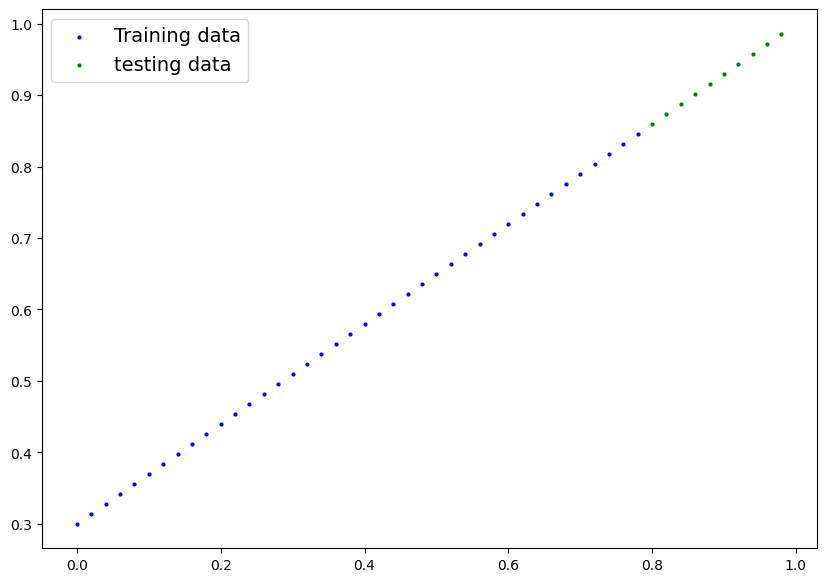

In [ ]:
plot_predictions()

In [ ]:
#CREATE linear regression model class
#everthying in pytorch module inherits nn module
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    #initializing model parameters
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    #forward method to define computation in model
  def forward(self,x:torch.Tensor)->torch.Tensor:
      return self.weights*x+self.bias
'''
Model starts with random values of weight and bias
looks at the training data and adjust the random values to better represent
the ideal values(weight and bias used to create data

Two main algorithms
1)Gadient discent
2)BackPropogation


initializing model parametes to be used various computations(this could be different layers from torch
from torch.nn,single parameters,hard coded values or functions)

requires grad=true means pytorch will track the gradients of this specific parameter for use with torch.autograd
(for many torch.nn module,requires grad=True is set by default)


Any subclass of nn.module requires to override the forward method
forward defines computation of model at the step


'''


'\nModel starts with random values of weight and bias\nlooks at the training data and adjust the random values to better represent\nthe ideal values(weight and bias used to create data\n\nTwo main algorithms\n1)Gadient discent\n2)BackPropogation\n\n\ninitializing model parametes to be used various computations(this could be different layers from torch\nfrom torch.nn,single parameters,hard coded values or functions)\n\nrequires grad=true means pytorch will track the gradients of this specific parameter for use with torch.autograd\n(for many torch.nn module,requires grad=True is set by default)\n\n\nAny subclass of nn.module requires to override the forward method\nforward defines computation of model at the step\n\n\n'

Pytorch model building essentials
torch.nn module contains all building blocks for computational graphs(neural network
torch.nn.Parameter what parameter should our model try and learn and then often pytorch layer will set these for us
torch.nn.Module is base class for
all neural networks if you subclass it you should overwrite the forward method

torch.optim-optimizer where pytorch live they will help with gradient descent and reduce loss




def forward ->what happens in forward computation


torch.utils.data.dataset
torch.utils.data.dataloader
torchvision.transformers


pretrained models torchvision.models


for evaluating the model
->torchmetrics




In [ ]:
#checking the contents of our pytorch model
#we can check model parameters or what inside our model using .parameters()
torch.manual_seed(42)
model_0=LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode():
  y_preds=model_0(X_test)
#torch.inference_mode is context manager when making predictions do it torch inference mode
#inference mode turns off gradient tracking it speeds up the computation
#with torch.no_grad() works similarly but inference mode is prefered
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

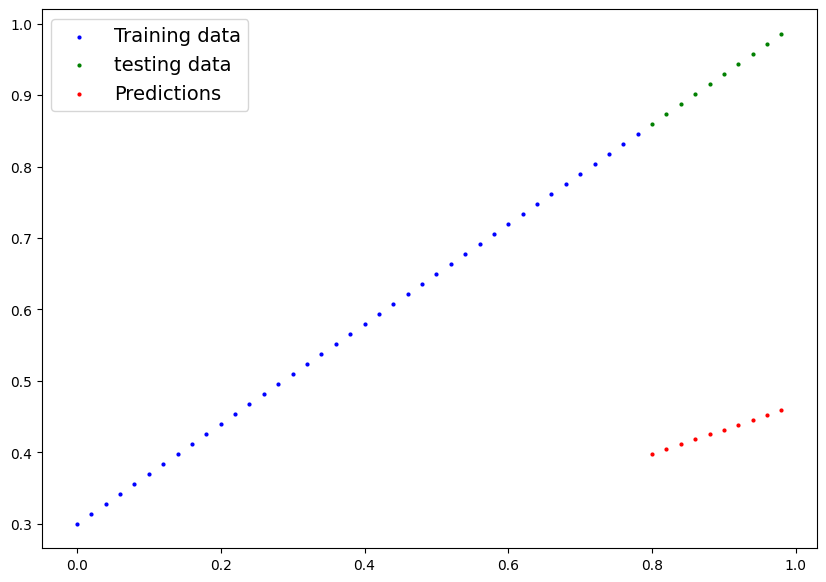

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
#loss function tells who poor the model performance
#loss function is also called cost function
'''
The things we  need to train
   Loss function
   optimizer:takes the acccoutn
    of loss and and adjusts its model performance(eg weight and bias)
improve lost function

In pytorch we need a training loop and testing loop
They are many loss functions in pytorch
nn.L1Loss -mean absolute error it is used for regression
nn.MSELoss-mean square error it is also used for regression
nn.CrossEntropyLoss-classification problem
nn.BCELoss-binary classification loss

synonym for loss fucntion is cretierion


'''

'\nThe things we  need to train \n   Loss function\n   optimizer:takes the acccoutn\n    of loss and and adjusts its model performance(eg weight and bias)\nimprove lost function\n\nIn pytorch we need a training loop and testing loop\nThey are many loss functions in pytorch\nnn.L1Loss -mean absolute error it is used for regression\nnn.MSELoss-mean square error it is also used for regression\nnn.CrossEntropyLoss-classification problem\nnn.BCELoss-binary classification loss\n\nsynonym for loss fucntion is cretierion\n\n\n'

In [ ]:
#setting up a loss function
loss_fn=nn.L1Loss()
#they are different optimizers in torch.optim package
#the most popular is sgd stochastic gradient
#PARAMS are model parameter you want to modify
#lr learning rate is most important hyper parameter we can set that defines how optmizers large or small changes
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [ ]:
#building a training loop adn testing loop in pytorch

'''
1)Looping through a data
2)forward pass(this involve model's forward() function(s))
in nn forward pass is moving data from input to output layer
3)Calculate the loss (compare forward pass prediction to ground truth labels)
4)optimizer zero grad
5)loss backward-move backward through the netwrok to calculate gradient(back propagation)
6)Optimizer step-use the optimizer to adjust the parameters to improve the loss(gradient descent)
to improve the gradient
gradient is change in y to change to x
moves models parameter so that gradient=0



'''

"\n1)Looping through a data\n2)forward pass(this involve model's forward() function(s))\nin nn forward pass is moving data from input to output layer\n3)Calculate the loss (compare forward pass prediction to ground truth labels)\n4)optimizer zero grad\n5)loss backward-move backward through the netwrok to calculate gradient(back propagation)\n6)Optimizer step-use the optimizer to adjust the parameters to improve the loss(gradient descent)\nto improve the gradient\ngradient is change in y to change to x\nmoves models parameter so that gradient=0\n\n\n\n"

In [ ]:
#An epoch is one loop through the data
torch.manual_seed(42)
epochs=200
#tracking model
epoch_count=[]
loss_values=[]
test_loss_values=[]
#training
for epoch in range(epochs):
  #seting model to training model
  model_0.train()#sets all parameters to required gradients
  #forward pass
  y_pred=model_0(X_train)
  loss=loss_fn(y_pred,y_train)


  #optimizer zero grad
  optimizer.zero_grad() #zero the optimizer before every epoch pass which they accumulate by default
  #back propogation with loss with respect to parameter
  loss.backward()

  #perform gcd

  optimizer.step() #by default optimizer changes will accumulate through the loop

  #test
  model_0.eval()#turns of gradient tracking

  print(model_0.state_dict())
  with torch.inference_mode():
    test_pred=model_0(X_test)
    test_loss=loss_fn(test_pred,y_test)
  if epoch%10==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)


OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
OrderedDict([('weights', tensor([0.3835])), ('bias', tensor([0.2488]))])
OrderedDict([('weights', tensor([0.3874])), ('bias', tensor([0.2588]))])
OrderedDict([('weights', tensor([0.3913])), ('bias'

In [ ]:
for epoch,loss,test_loss in zip(epoch_count,loss_values,test_loss_values):
  print(f"{epoch}|test_loss:{test_loss}|loss:{loss}")



0|test_loss:0.48106518387794495|loss:0.31288138031959534
10|test_loss:0.3463551998138428|loss:0.1976713240146637
20|test_loss:0.21729660034179688|loss:0.08908725529909134
30|test_loss:0.14464017748832703|loss:0.053148526698350906
40|test_loss:0.11360953003168106|loss:0.04543796554207802
50|test_loss:0.09919948130846024|loss:0.04167863354086876
60|test_loss:0.08886633068323135|loss:0.03818932920694351
70|test_loss:0.0805937647819519|loss:0.03476089984178543
80|test_loss:0.07232122868299484|loss:0.03132382780313492
90|test_loss:0.06473556160926819|loss:0.02788739837706089
100|test_loss:0.05646304413676262|loss:0.024458957836031914
110|test_loss:0.04819049686193466|loss:0.021020207554101944
120|test_loss:0.04060482233762741|loss:0.01758546568453312
130|test_loss:0.03233227878808975|loss:0.014155393466353416
140|test_loss:0.024059748277068138|loss:0.010716589167714119
150|test_loss:0.016474086791276932|loss:0.0072835334576666355
160|test_loss:0.008201557211577892|loss:0.0038517764769494534

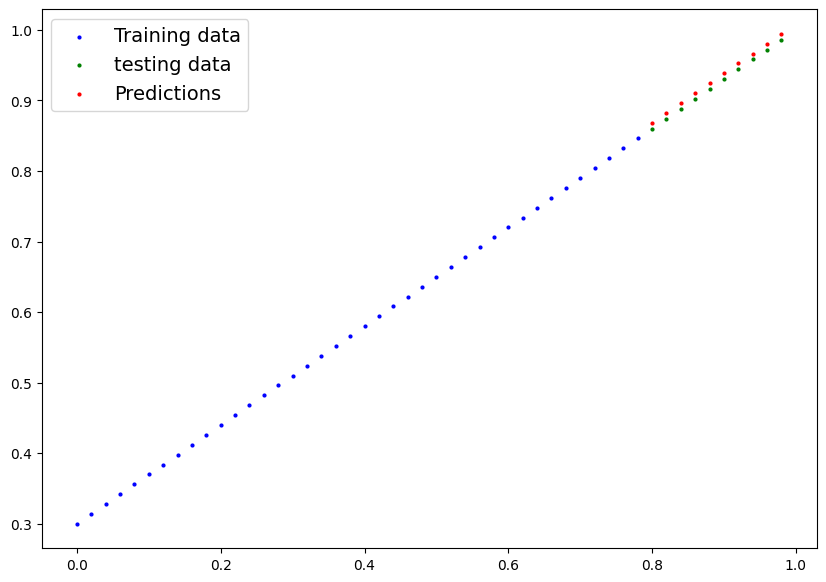

In [ ]:

plot_predictions(predictions=test_pred)

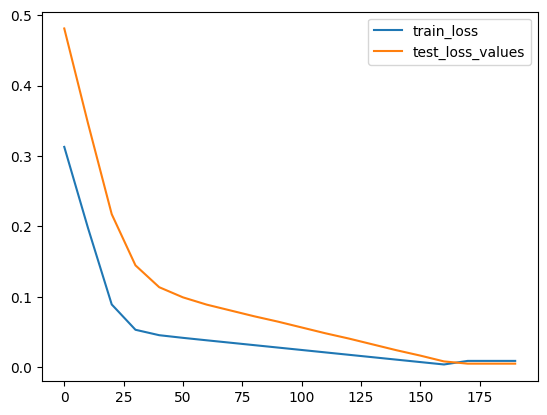

In [ ]:
import numpy as np

plt.plot(epoch_count,np.array(torch.tensor(loss_values).cpu().numpy()),label="train_loss")
plt.plot(epoch_count,test_loss_values,label="test_loss_values")
plt.legend()


In [ ]:
model_0.state_dict()


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
weight,bias

(0.7, 0.3)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
model_0

LinearRegressionModel()

In [ ]:
#saving model in pytorch
'''
They are are three main methods to save the model
1)python pickle model-torch.save()
2)torch.load()-allows to load the saved Pytorch object
3)torch.nn.Module.load_state_dict()-this allows to load model saved state dictionary








'''
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="pytorch_workflow_model_Linear_regression_Model.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
print(MODEL_SAVE_PATH)
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)







models/pytorch_workflow_model_Linear_regression_Model.pth


In [192]:
#loading a pytorch model
loaded_model_0=LinearRegressionModel()
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [193]:
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [194]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])